# Question 1: Topic Modeling

In [1]:
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np

In [2]:
# importing required modules 
# specifying the zip file name 
data = "Assignment four data Yelp (question 1 and 2).zip"
  
# opening the zip file in READ mode 
with ZipFile(data, 'r') as zip: 
      
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [51]:
foldername = 'Assignment four data Yelp (question 1 and 2)'
columns = ['review_id', 'business_id', 'user_id', 'text', 'date', 'useful', 'cool', 'funny', 'stars']
d = {key : [] for key in columns}
for filename in os.listdir(os.path.join(os.getcwd(), foldername)):
    with open(os.path.join(os.getcwd(), foldername, filename), 'r') as f: # open in readonly mode
        data = pd.read_json(f)
        for column in data.columns:
            d[column].append(data[column].values)

In [52]:
for key, value in d.items():
    d[key] = np.array(value).flatten()
yelp = pd.DataFrame(d)

In [4]:
yelp.head()

,review_id,business_id,user_id,text,date,useful,cool,funny,stars
0,SDR--ohHq1Llp_okVXL7XA,kICgNgVRkIh4doz0atyMMA,qynvfefLolj3khl52JpOMA,Food is nothing special - if one paid $7 a dis...,2013-07-21 07:38:43,2,0,0,2
1,yHpJ6-icJLe1f_DE-EGVgg,PRz-0bPh1FdszZqt9uq4sQ,dIIKEfOgo0KqUfGQvGikPg,"Take me out to the ballgame, take me out to th...",2009-03-27 05:38:00,6,8,6,4
2,mgVgwKg6J_og9oJCO7Dqqg,l_kefVF1frmC0xRW2YkvUA,Ct77aBDwU0PwJyOhjPTKXQ,Slow service. Food didn't come out right and c...,2017-03-19 01:58:52,1,0,0,1
3,Dw3HFgMxzFz8Ac2hpqiLbw,YlVgpTsLGrzZNJ039psmIA,YRBvDNPiGCTbvKnGRSZ4ZQ,"Food is good, service is unpredictable -- in t...",2014-01-03 19:02:01,0,0,0,2
4,JRBr5tEKUV-PyqMuegIJhQ,cth3pA7Mj_v2Ka9GeOd0Ng,ifmYEcu9jXiNY7TWW3fCvw,I took my boys to Gene Woods in December ( we...,2016-07-28 19:03:54,2,3,0,5


In [5]:
yelp.shape

(500000, 9)

In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
review_id      500000 non-null object
business_id    500000 non-null object
user_id        500000 non-null object
text           500000 non-null object
date           500000 non-null datetime64[ns]
useful         500000 non-null int64
cool           500000 non-null int64
funny          500000 non-null int64
stars          500000 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 34.3+ MB


In [7]:
yelp.describe()

,useful,cool,funny,stars
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.134950,0.466564,0.384414,3.744078
std,2.424665,1.495180,1.371608,1.442170
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,4.000000
75%,1.000000,0.000000,0.000000,5.000000
max,151.000000,99.000000,93.000000,5.000000


In [8]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,review_id,business_id,user_id,text,date,useful,cool,funny,stars,text length
0,SDR--ohHq1Llp_okVXL7XA,kICgNgVRkIh4doz0atyMMA,qynvfefLolj3khl52JpOMA,Food is nothing special - if one paid $7 a dis...,2013-07-21 07:38:43,2,0,0,2,260
1,yHpJ6-icJLe1f_DE-EGVgg,PRz-0bPh1FdszZqt9uq4sQ,dIIKEfOgo0KqUfGQvGikPg,"Take me out to the ballgame, take me out to th...",2009-03-27 05:38:00,6,8,6,4,872
2,mgVgwKg6J_og9oJCO7Dqqg,l_kefVF1frmC0xRW2YkvUA,Ct77aBDwU0PwJyOhjPTKXQ,Slow service. Food didn't come out right and c...,2017-03-19 01:58:52,1,0,0,1,277
3,Dw3HFgMxzFz8Ac2hpqiLbw,YlVgpTsLGrzZNJ039psmIA,YRBvDNPiGCTbvKnGRSZ4ZQ,"Food is good, service is unpredictable -- in t...",2014-01-03 19:02:01,0,0,0,2,310
4,JRBr5tEKUV-PyqMuegIJhQ,cth3pA7Mj_v2Ka9GeOd0Ng,ifmYEcu9jXiNY7TWW3fCvw,I took my boys to Gene Woods in December ( we...,2016-07-28 19:03:54,2,3,0,5,827


In [9]:
pos_reviews = yelp.text[yelp.stars>3].values
neg_reviews = yelp.text[yelp.stars<3].values
print('Postive Reviews:  {:,}'.format(len(pos_reviews)))
print('Negative Reviews:  {:,}'.format(len(neg_reviews)))

Postive Reviews:  333,177
Negative Reviews:  111,045


In [10]:
# additional stopwords
from sklearn.feature_extraction import text 
extra_words = ['ve', 'like', 'got', 'Cleveland', 'just', 
               'don', 'really', 'said', 'told', 'ok',
               'came', 'went', 'did', 'didn', 'good']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_words)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object to generate term document counts
tfidf_pos = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

tfidf_neg = TfidfVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 20000
random_neg = np.random.choice(neg_reviews, size=num_reviews)
random_pos = np.random.choice(pos_reviews, size=num_reviews)

dicty = {'pizzas':'pizza', 'burgers':'burger', 'ordered':'order',
         'prices':'price', 'topping':'toppings'}
def replace_words(text, dicty):
    '''Returns text with word substitutions made according
       to the passed `dicty` dictionary'''
    for i,j in dicty.items():
        text = text.replace(i,j)
    return text

random_neg = [replace_words(w, dicty) for w in random_neg]
random_pos = [replace_words(w, dicty) for w in random_pos]

# Get the vectors
neg_vectors = tfidf_neg.fit_transform(random_neg)
pos_vectors = tfidf_pos.fit_transform(random_pos)

/Users/yildizesener/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cleveland'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/Users/yildizesener/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cleveland'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [12]:
# Store TFIDF vectors in a Pandas DataFrame to investigate further
neg_df = pd.DataFrame(neg_vectors.todense(), columns=[tfidf_neg.get_feature_names()])
pos_df = pd.DataFrame(pos_vectors.todense(), columns=[tfidf_pos.get_feature_names()])

# get mean for each column (word): highest means are most important words
col_means_neg = {}
for col in neg_df:
    col_means_neg[col] = neg_df[col].mean()

col_means_pos = {}
for col in pos_df:
    col_means_pos[col] = pos_df[col].mean()

In [13]:
no_top_words = 20

print('Top %d words in POSITIVE reviews:' %no_top_words, end='')
print(sorted(col_means_pos, key=col_means_pos.get, reverse=True)[:no_top_words])

print('Top %d words in NEGATIVE reviews:' %no_top_words, end='')
print(sorted(col_means_neg, key=col_means_neg.get, reverse=True)[:no_top_words])

Top 20 words in POSITIVE reviews:[('great',), ('food',), ('place',), ('service',), ('time',), ('love',), ('best',), ('friendly',), ('amazing',), ('nice',), ('staff',), ('order',), ('delicious',), ('definitely',), ('price',), ('recommend',), ('try',), ('chicken',), ('restaurant',), ('come',)]
Top 20 words in NEGATIVE reviews:[('food',), ('service',), ('place',), ('order',), ('time',), ('minutes',), ('bad',), ('people',), ('asked',), ('customer',), ('restaurant',), ('better',), ('come',), ('chicken',), ('great',), ('took',), ('going',), ('staff',), ('pizza',), ('way',)]


# LSA

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from gensim import corpora, models, similarities, matutils

# Convert sparse matrix of counts to a gensim corpus
# Need to transpose it for gensim which wants terms by docs instead of docs by terms
tfidf_pos_corpus = matutils.Sparse2Corpus(pos_vectors.transpose())
tfidf_neg_corpus = matutils.Sparse2Corpus(neg_vectors.transpose())

# Row indices
id2word_pos = dict((v,k) for k,v in tfidf_pos.vocabulary_.items())
id2word_neg = dict((v,k) for k,v in tfidf_neg.vocabulary_.items())

# This is a hack for Python 3!
id2word_pos = corpora.Dictionary.from_corpus(tfidf_pos_corpus, id2word=id2word_pos)
id2word_neg = corpora.Dictionary.from_corpus(tfidf_neg_corpus, id2word=id2word_neg)

# create LSA model
num_topics = 20
lsi_pos = models.LsiModel(tfidf_pos_corpus, id2word=id2word_pos, num_topics=num_topics)
lsi_neg = models.LsiModel(tfidf_neg_corpus, id2word=id2word_neg, num_topics=num_topics)

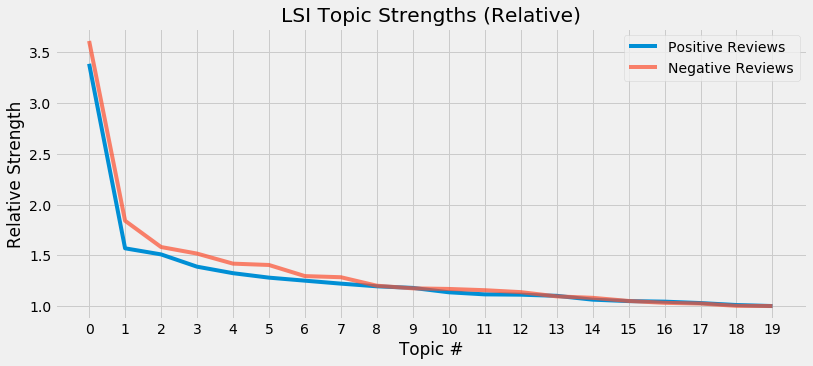

In [15]:
# elbow plot
singular_values_pos = lsi_pos.projection.s.tolist()
singular_values_pos_rel = [sv/singular_values_pos[-1] for sv in singular_values_pos]
singular_values_neg = lsi_neg.projection.s.tolist()
singular_values_neg_rel = [sv/singular_values_neg[-1] for sv in singular_values_neg]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.plot(range(len(singular_values_pos)), singular_values_pos_rel, label='Positive Reviews', alpha=1.0)
plt.plot(range(len(singular_values_neg)), singular_values_neg_rel, label='Negative Reviews', alpha=0.7)
plt.xticks(range(len(singular_values_pos)), range(len(singular_values_pos)))
plt.xlabel('Topic #')
plt.ylabel('Relative Strength')
plt.title('LSI Topic Strengths (Relative)')
plt.legend(loc=0, fontsize='medium');

In [16]:
from pprint import pprint
topics_to_print = 20

In [17]:
print('Top %d topics for POSITIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_pos.show_topics()[0:topics_to_print])

Top 20 topics for POSITIVE reviews
---------------------------------
[(0,
  '0.292*"great" + 0.278*"food" + 0.242*"place" + 0.198*"service" + '
  '0.146*"time" + 0.137*"love" + 0.128*"friendly" + 0.127*"best" + '
  '0.124*"amazing" + 0.124*"order"'),
 (1,
  '0.474*"great" + -0.233*"order" + 0.219*"service" + -0.215*"chicken" + '
  '0.170*"staff" + 0.157*"friendly" + -0.144*"pizza" + -0.131*"delicious" + '
  '-0.126*"sauce" + -0.115*"rice"'),
 (2,
  '-0.510*"food" + -0.304*"great" + -0.227*"service" + 0.163*"time" + '
  '0.114*"hair" + 0.101*"car" + 0.101*"work" + -0.101*"delicious" + '
  '-0.097*"chicken" + 0.096*"day"'),
 (3,
  '-0.891*"pizza" + -0.205*"great" + 0.157*"sushi" + -0.122*"crust" + '
  '-0.083*"cheese" + 0.069*"food" + -0.065*"wings" + 0.059*"rice" + '
  '-0.054*"beer" + -0.054*"slice"'),
 (4,
  '0.535*"love" + 0.480*"place" + 0.380*"sushi" + -0.166*"service" + '
  '-0.117*"order" + 0.106*"best" + -0.103*"experience" + -0.096*"time" + '
  '-0.091*"food" + 0.087*"favorite"

In [18]:
print('Top %d topics for NEGATIVE reviews' %(topics_to_print))
print('-'*33)
pprint(lsi_neg.show_topics()[0:topics_to_print])

Top 20 topics for NEGATIVE reviews
---------------------------------
[(0,
  '0.275*"food" + 0.221*"order" + 0.201*"service" + 0.191*"place" + '
  '0.167*"time" + 0.131*"minutes" + 0.097*"restaurant" + 0.097*"asked" + '
  '0.097*"bad" + 0.094*"people"'),
 (1,
  '0.382*"food" + -0.234*"car" + 0.220*"order" + 0.195*"chicken" + '
  '-0.183*"room" + -0.143*"customer" + -0.130*"called" + -0.120*"hotel" + '
  '0.105*"pizza" + -0.100*"phone"'),
 (2,
  '0.825*"pizza" + -0.282*"food" + 0.228*"order" + -0.167*"service" + '
  '0.106*"delivery" + 0.104*"cheese" + 0.086*"crust" + 0.081*"sauce" + '
  '0.068*"wings" + 0.063*"called"'),
 (3,
  '0.345*"minutes" + 0.283*"order" + 0.225*"service" + -0.209*"room" + '
  '-0.194*"place" + -0.179*"chicken" + 0.173*"waited" + 0.146*"wait" + '
  '-0.144*"hotel" + 0.122*"waiting"'),
 (4,
  '0.482*"room" + -0.329*"car" + 0.297*"hotel" + -0.187*"customer" + '
  '-0.183*"service" + 0.182*"minutes" + 0.147*"stay" + 0.127*"rooms" + '
  '0.121*"night" + 0.119*"table"'

# LDA

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a vectorizer object to generate term document counts
cv_pos = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

cv_neg = CountVectorizer(stop_words=stop_words, min_df=10, max_df=0.5, 
                        ngram_range=(1,1), token_pattern='[a-z][a-z]+')

# Get random subset of reviews
np.random.seed(38)
num_reviews = 15000
cv_random_neg = np.random.choice(neg_reviews, size=num_reviews)
cv_random_pos = np.random.choice(pos_reviews, size=num_reviews)

# replace words from defined dictionary 'dicty'
cv_random_neg = [replace_words(w, dicty) for w in cv_random_neg]
cv_random_pos = [replace_words(w, dicty) for w in cv_random_pos]

# Get the cv vectors
cv_neg_vectors = cv_neg.fit_transform(cv_random_neg).transpose()
cv_pos_vectors = cv_pos.fit_transform(cv_random_pos).transpose()

/Users/yildizesener/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cleveland'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/Users/yildizesener/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cleveland'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [20]:
# Convert sparse matrix of counts to a gensim corpus
corpus_neg = matutils.Sparse2Corpus(cv_neg_vectors)
corpus_pos = matutils.Sparse2Corpus(cv_pos_vectors)

# save a mapping (dict) of row id to word (token) for later use by gensim 
id2word_cv_pos = dict((v, k) for k, v in cv_pos.vocabulary_.items())
id2word_cv_neg = dict((v, k) for k, v in cv_neg.vocabulary_.items())

In [21]:
# create lda multicore model
lda_pos = models.ldamulticore.LdaMulticore(corpus=corpus_pos, num_topics=20, 
                                           id2word=id2word_cv_pos, passes=10, workers=15)
lda_neg = models.ldamulticore.LdaMulticore(corpus=corpus_neg, num_topics=20, 
                                           id2word=id2word_cv_neg, passes=10, workers=15)

In [22]:
print('Top topics + words for POSITIVE reviews')
print('-'*39)
pprint(lda_pos.print_topics(num_words=10))

print('\nTop topics + words for NEGATIVE reviews')
print('-'*39)
pprint(lda_neg.print_topics(num_words=10))

Top topics + words for POSITIVE reviews
---------------------------------------
[(0,
  '0.021*"store" + 0.018*"great" + 0.014*"service" + 0.008*"staff" + '
  '0.008*"needed" + 0.008*"dr" + 0.008*"helpful" + 0.008*"care" + '
  '0.007*"customer" + 0.007*"day"'),
 (1,
  '0.022*"place" + 0.016*"great" + 0.011*"food" + 0.009*"time" + '
  '0.009*"people" + 0.007*"nice" + 0.007*"service" + 0.006*"work" + '
  '0.006*"dog" + 0.005*"day"'),
 (2,
  '0.011*"time" + 0.008*"service" + 0.008*"order" + 0.006*"great" + '
  '0.006*"best" + 0.006*"vegas" + 0.005*"place" + 0.005*"free" + 0.005*"stars" '
  '+ 0.005*"day"'),
 (3,
  '0.020*"food" + 0.012*"service" + 0.011*"place" + 0.010*"restaurant" + '
  '0.009*"great" + 0.008*"time" + 0.007*"menu" + 0.007*"best" + 0.006*"price" '
  '+ 0.006*"happy"'),
 (4,
  '0.036*"great" + 0.021*"breakfast" + 0.020*"food" + 0.016*"place" + '
  '0.013*"service" + 0.010*"brunch" + 0.008*"love" + 0.007*"staff" + '
  '0.007*"eggs" + 0.006*"friendly"'),
 (5,
  '0.021*"room" 

# Question 2: Yelp Review Sentiment Analysis

In [53]:
data_classes = yelp[(yelp['stars']==1) | (yelp['stars']==3) | (yelp['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(346621, 9)
2     Slow service. Food didn't come out right and c...
4     I took my boys to Gene Woods in December  ( we...
6     If I ever get married again, I will definitely...
9     I grew up in this area, but moved away over 20...
10    Ladies if you want to go to a strip club with ...
Name: text, dtype: object
2     1
4     5
6     5
9     5
10    3
Name: stars, dtype: int64


In [54]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [58]:
import string
from nltk.corpus import stopwords

In [ ]:
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)

In [ ]:
x = vocab.transform(x)

print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

# Question 3: House price prediction

In [23]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
print("Skewness of the Saleprice target variable is: %f" %train['SalePrice'].skew())
print("Kurtosis of the Saleprice target variable is: %f" %train['SalePrice'].kurt())

Skewness of the Saleprice target variable is: 1.882876
Kurtosis of the Saleprice target variable is: 6.536282


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize']=(10,6)

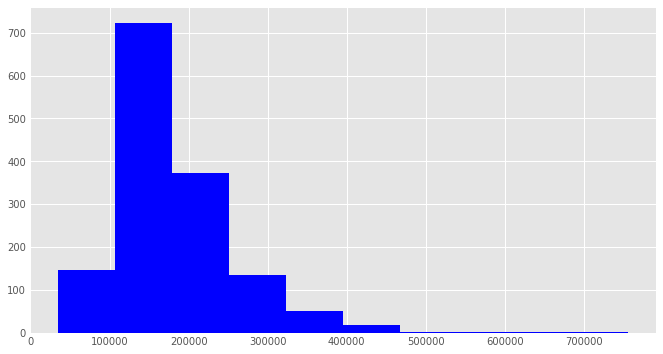

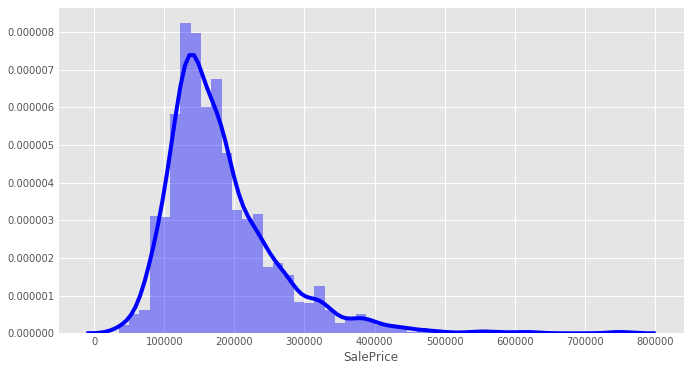

In [29]:
plt.hist(train['SalePrice'],color='blue')
plt.show()
sns.distplot(train['SalePrice'],color='blue')

Skewness of the Saleprice target variable is: 0.121335


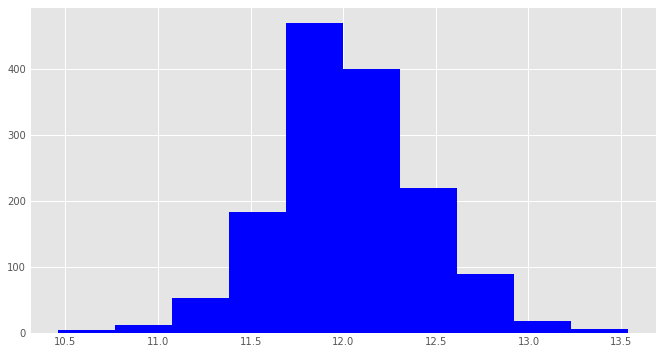

In [30]:
target=np.log(train['SalePrice'])
print("Skewness of the Saleprice target variable is: %f" %target.skew())
plt.hist(target,color="blue")
plt.show()

In [31]:
numeric_features=train.select_dtypes(include=[np.number])
print(numeric_features.dtypes)
print(len(numeric_features.dtypes))

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object
38


In [32]:
objects=train.select_dtypes(exclude=[np.number])
objects.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
print(train['Street'].value_counts())
train['encode_street']=pd.get_dummies(train['Street'],drop_first=True)
test['encode_street']=pd.get_dummies(test['Street'],drop_first=True)
print(train['encode_street'].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
1    1454
0       6
Name: encode_street, dtype: int64


In [34]:
def encode(x):
    return 1 if x=='Partial' else 0
train['encode_salecondition']=train['SaleCondition'].apply(encode)
test['encode_salecondition']=test['SaleCondition'].apply(encode)

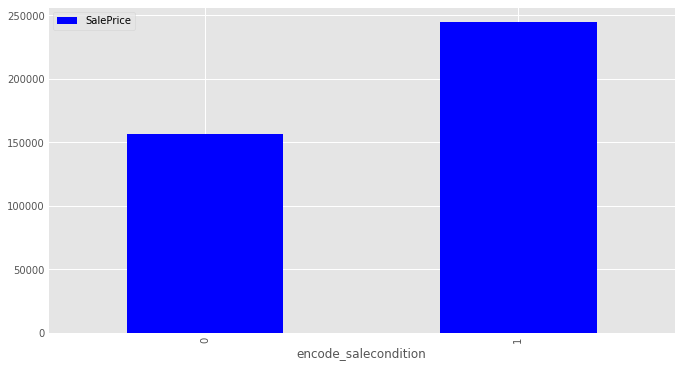

In [35]:
sale_cond_pivot=train.pivot_table(index='encode_salecondition',values='SalePrice',aggfunc=np.median)
sale_cond_pivot.plot(kind='bar',color='blue')

In [36]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [40]:
y=np.log(data['SalePrice'])
X=data.drop(['Id','SalePrice'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print(lr.score(X_test,y_test))

0.8647463410578186


In [44]:
predictions=lr.predict(X_test)
predictions

array([11.9279834 , 12.613182  , 11.68259543, 12.05987131, 12.63253959,
       11.34017959, 12.36985395, 11.93306706, 11.33361845, 11.8873002 ,
       11.90336699, 11.71321408, 11.32671299, 12.16460468, 12.08187177,
       11.79864133, 12.22721937, 11.74929298, 11.63970466, 12.27110097,
       12.03697898, 12.22741216, 12.12230909, 11.82231934, 12.2132387 ,
       11.86591032, 12.19720539, 11.46528684, 12.07106423, 12.11747771,
       11.67356399, 12.49781739, 12.14008396, 11.55127135, 12.49627395,
       11.94978138, 11.83206113, 12.27481476, 12.76509994, 11.51734167,
       11.83795841, 12.39362526, 11.6256284 , 12.62487596, 11.77115464,
       11.60810673, 11.5989006 , 11.77156953, 12.86446838, 11.68121561,
       11.63786656, 12.2088134 , 11.66507159, 12.70582127, 11.91615344,
       12.33997515, 12.32311651, 11.90244966, 11.93379254, 11.70307523,
       11.33490715, 11.91328669, 12.5678348 , 12.43842297, 12.58908428,
       12.29753883, 11.52421386, 12.71334064, 11.62400915, 11.93

In [45]:
test_data=test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [46]:
pred=lr.predict(test_data)
pred

array([11.68856268, 11.71858472, 12.03237122, ..., 12.05801099,
       11.59342239, 12.38664403])

In [47]:
final_predictions=np.exp(pred)
final_predictions

array([119200.5537467 , 122833.45845104, 168109.56584158, ...,
       172475.58815667, 108382.55137782, 239580.32672689])